Term Project

Author: Jordan, Andrew

In [213]:
from __future__ import print_function, division
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
import pandas as pd
import statistics
import sys
import nsfg
import first
import math
import random
import thinkstats2
import thinkplot
import scatter
import regression
import timeseries
import scipy.stats as stats

In [214]:
#Import data into dataframe
nbaData = pd.read_csv("championsdata.csv")
nbaData
nbaDF_baseline = pd.DataFrame(nbaData, columns=["Year","FG","FGA","TP","TPA","TOV"])
print(nbaDF_baseline)

     Year  FG  FGA  TP  TPA  TOV
0    1980  48   89   0    0   17
1    1980  48   95   0    1   26
2    1980  44   92   0    1   20
3    1980  44   93   0    0   19
4    1980  41   91   0    0   21
..    ...  ..  ...  ..  ...  ...
215  2017  46   90  14   38   13
216  2018  46   90  13   36    7
217  2018  47   82  15   36   12
218  2018  42   81   9   26   10
219  2018  39   86  14   38    8

[220 rows x 6 columns]


In [215]:
#Combine rows by year and sum variables
nbaDF = nbaDF_baseline.groupby(["Year"]).agg({"FG":sum,"FGA":sum,"TP":sum,"TPA":sum,"TOV":sum})
nbaDF

,FG,FGA,TP,TPA,TOV
Year,,,,,
1980,270,552,0,4,120
1981,241,512,3,17,101
1982,273,551,1,9,116
1983,172,354,0,3,68
1984,294,650,9,23,111
1985,278,543,8,23,75
1986,262,533,10,32,95
1987,280,544,16,41,67
1988,248,531,10,40,92


In [216]:
#Correlation Matrix to check for potential relationships
nbaDF.corr()

,FG,FGA,TP,TPA,TOV
FG,1.000000,0.937614,-0.215191,-0.198226,0.620104
FGA,0.937614,1.000000,-0.087519,-0.022303,0.716722
TP,-0.215191,-0.087519,1.000000,0.958290,-0.252195
TPA,-0.198226,-0.022303,0.958290,1.000000,-0.178499
TOV,0.620104,0.716722,-0.252195,-0.178499,1.000000


FG Summary

The histogram for field goals shows a multi-modal distribution, with a mean of approximately 213. Though there appears to be two outliers at 128 field goals and 294 field goals, these are explained by the length of the championship series in their respective years of 2007 and 1984. As each championship series contains anywhere between four and seven games the data may vary slightly based on teams' opportunity to score points, however as each championship series statistics are important to identifying the most important statistic of a champion, the data that appears to be an outlier must remain included.

<AxesSubplot:xlabel='FG', ylabel='Count'>

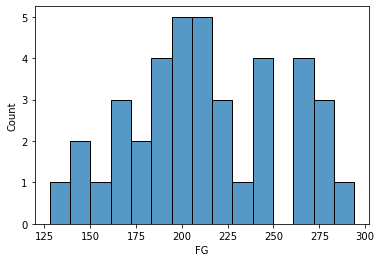

In [217]:
#Histogram
sns.histplot(data=nbaDF, x=nbaDF["FG"], bins = 15)

In [218]:
#Descriptive Characteristics
fg = nbaDF["FG"]
fg.describe()

count     39.000000
mean     212.948718
std       41.257184
min      128.000000
25%      190.500000
50%      212.000000
75%      243.500000
max      294.000000
Name: FG, dtype: float64

In [219]:
fg.mode()

0    197
1    216
2    223
3    241
4    263
dtype: int64

In [220]:
fg.var()

1702.1551956815113

In [221]:
fg.skew()

0.08874169116155282

In [222]:
fg.tail()

Year
2014    191
2015    217
2016    263
2017    216
2018    174
Name: FG, dtype: int64

FGA Summary

The Field Goals Attempted histogram appears to be bi-modal with a mean of 456. One significant outlier exists at 650, and corresponds to the upper end of the Field Goals variable as it is a product of the 1984 seven game championship series. As the statistics of each year's champion is relevant, the apparent outlier must remain in the dataset.

<AxesSubplot:xlabel='FGA', ylabel='Count'>

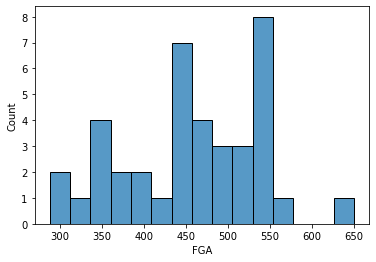

In [223]:
sns.histplot(data=nbaDF, x=nbaDF["FGA"], bins = 15)

In [224]:
#Descriptive Characteristics
fga = nbaDF["FGA"]
fga.describe()

count     39.000000
mean     456.230769
std       86.113897
min      288.000000
25%      396.500000
50%      462.000000
75%      527.000000
max      650.000000
Name: FGA, dtype: float64

In [225]:
fga.mode()

0    512
1    544
dtype: int64

In [226]:
fga.var()

7415.603238866398

In [227]:
fga.skew()

-0.22044311357548654

In [228]:
fga.tail()

Year
2014    362
2015    498
2016    577
2017    455
2018    339
Name: FGA, dtype: int64

TP Summary

The Three Pointer histogram shows a multi-modal distribution, with several peaks and 10 occurrences of 50 or more three pointers. Despite these occurrences the mean is 30, indicating that while during several championship series the ability to successfully make three pointers played a role, for most series it has not been required to score many three pointers to win the championship.

<AxesSubplot:xlabel='TP', ylabel='Count'>

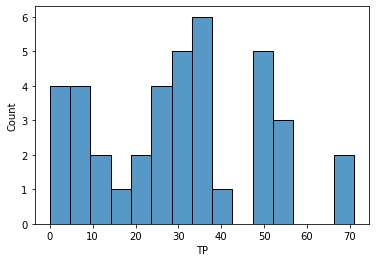

In [229]:
sns.histplot(data=nbaDF, x=nbaDF["TP"], bins = 15)

In [230]:
#Descriptive Characteristics
tp = nbaDF["TP"]
tp.describe()

count    39.000000
mean     30.205128
std      19.434342
min       0.000000
25%      13.000000
50%      32.000000
75%      44.500000
max      71.000000
Name: TP, dtype: float64

In [231]:
tp.mode()

0    32
1    51
dtype: int64

In [232]:
tp.var()

377.69365721997303

In [233]:
tp.skew()

0.15155597440145785

In [234]:
tp.tail()

Year
2014    55
2015    67
2016    56
2017    71
2018    51
Name: TP, dtype: int64

TPA Summary

With several peaks the Three Pointers Attempted histogram shows a multi-modal distribution, with three occurrences of over 170 three pointers attempted. As the next highest number of attempted three pointers is 138, the three occurrences over 170 are indeed outliers, but as it is important to illustrate the changes in each statistics value over time all three upper outliers are relvant data that must remain. 

<AxesSubplot:xlabel='TPA', ylabel='Count'>

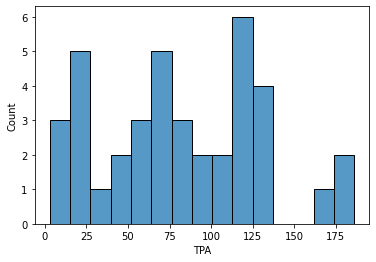

In [235]:
sns.histplot(data=nbaDF, x=nbaDF["TPA"], bins = 15)

In [236]:
#Descriptive Characteristics
tpa = nbaDF["TPA"]
tpa.describe()

count     39.000000
mean      82.384615
std       50.030841
min        3.000000
25%       40.500000
50%       78.000000
75%      122.000000
max      186.000000
Name: TPA, dtype: float64

In [237]:
tpa.mode()

0     23
1     75
2     92
3    121
4    123
5    186
dtype: int64

In [238]:
tpa.var()

2503.0850202429156

In [239]:
tpa.skew()

0.20348795957407512

In [240]:
tpa.tail()

Year
2014    118
2015    186
2016    170
2017    186
2018    136
Name: TPA, dtype: int64

TOV Summary

The Turnovers histogram also shows a multi-modal distribution with a mildly positive skew and mean of 77 turnovers. Unlike the other variables, there does not appear to be any significant outliers with a relatively small standard deviation of 20.23.  

<AxesSubplot:xlabel='TOV', ylabel='Count'>

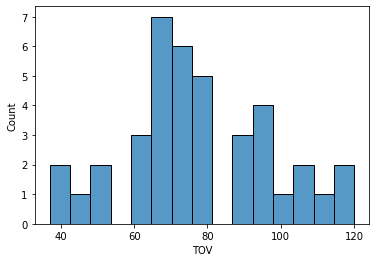

In [241]:
sns.histplot(data=nbaDF, x=nbaDF["TOV"], bins = 15)

In [242]:
#Descriptive Characteristics
tov = nbaDF["TOV"]
tov.describe()

count     39.000000
mean      77.333333
std       20.229386
min       37.000000
25%       66.000000
50%       75.000000
75%       92.500000
max      120.000000
Name: TOV, dtype: float64

In [243]:
tov.mode()

0    67
1    75
dtype: int64

In [244]:
tov.var()

409.2280701754387

In [245]:
tov.skew()

0.17327932951958472

In [246]:
tov.tail()

Year
2014    67
2015    76
2016    93
2017    67
2018    37
Name: TOV, dtype: int64

In [247]:
print(nbaDF.var())

FG     1702.155196
FGA    7415.603239
TP      377.693657
TPA    2503.085020
TOV     409.228070
dtype: float64


In [248]:
print(nbaDF.mode())

      FG    FGA    TP  TPA   TOV
0  197.0  512.0  32.0   23  67.0
1  216.0  544.0  51.0   75  75.0
2  223.0    NaN   NaN   92   NaN
3  241.0    NaN   NaN  121   NaN
4  263.0    NaN   NaN  123   NaN
5    NaN    NaN   NaN  186   NaN


In [249]:
nbaDF.skew()

FG     0.088742
FGA   -0.220443
TP     0.151556
TPA    0.203488
TOV    0.173279
dtype: float64

In [250]:
nbaDF.tail()

,FG,FGA,TP,TPA,TOV
Year,,,,,
2014,191,362,55,118,67
2015,217,498,67,186,76
2016,263,577,56,170,93
2017,216,455,71,186,67
2018,174,339,51,136,37


In [251]:
nbaDF.describe()

,FG,FGA,TP,TPA,TOV
count,39.000000,39.000000,39.000000,39.000000,39.000000
mean,212.948718,456.230769,30.205128,82.384615,77.333333
std,41.257184,86.113897,19.434342,50.030841,20.229386
min,128.000000,288.000000,0.000000,3.000000,37.000000
25%,190.500000,396.500000,13.000000,40.500000,66.000000
50%,212.000000,462.000000,32.000000,78.000000,75.000000
75%,243.500000,527.000000,44.500000,122.000000,92.500000
max,294.000000,650.000000,71.000000,186.000000,120.000000


PMF

In [252]:
#Separate turnover rates into high and low categories and create histogram/PMF for each

tov_high = nbaDF[nbaDF.TOV >=77]
tov_low = nbaDF[nbaDF.TOV <77]

high_hist = thinkstats2.Hist(tov_high)
low_hist = thinkstats2.Hist(tov_low)

high_pmf = thinkstats2.Pmf(tov_high.TOV, label = "High Turnover Rate")
low_pmf = thinkstats2.Pmf(tov_low.TOV, label = "Low Turnover Rate")

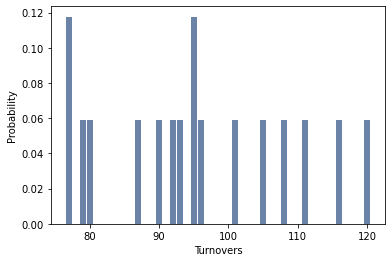

In [253]:
#Plot high turnover rate PMF
thinkplot.Hist(high_pmf)
thinkplot.config(xlabel="Turnovers", ylabel="Probability")

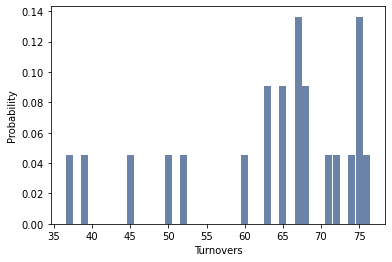

In [254]:
#Plot low turnover rate PMF
thinkplot.Hist(low_pmf)
thinkplot.config(xlabel="Turnovers", ylabel="Probability")

CDF

The CDF suggests that approximately 80% of champions had less than 100 turnovers in their championship game series. With this information, it indicates that a low turnover rate may be significant in a team's pursuit of a championship victory. 

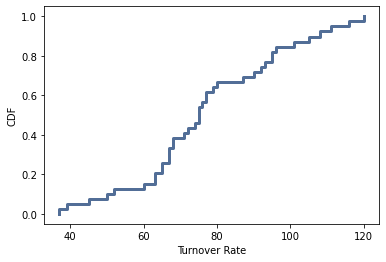

In [255]:
tov_cdf = thinkstats2.Cdf(nbaDF.TOV, label = "Turnovers")
thinkplot.Cdf(tov_cdf)
thinkplot.Config(xlabel="Turnover Rate", ylabel="CDF", loc="upper left")

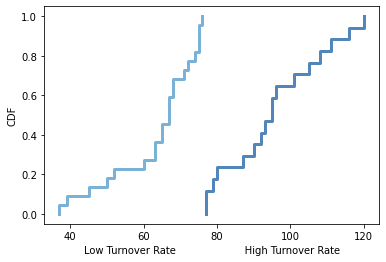

<Figure size 576x432 with 0 Axes>

In [256]:
high_cdf = thinkstats2.Cdf(tov_high.TOV, label = "High Turnover Rate")
low_cdf = thinkstats2.Cdf(tov_low.TOV, label = "Low Turnover Rate")

thinkplot.PrePlot(2)
thinkplot.Cdfs([high_cdf,low_cdf])
thinkplot.Show(xlabel="Low Turnover Rate                      High Turnover Rate", ylabel="CDF")

Analytical Distribution

C:\Users\Andrew\Desktop\Grad School\Data Exploration and Analysis\ThinkStats2-master\ThinkStats2-master\code\thinkstats2.py:2478: RuntimeWarning: Mean of empty slice.
  mean = xs.mean()
C:\Users\Andrew\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Andrew\Desktop\Grad School\Data Exploration and Analysis\ThinkStats2-master\ThinkStats2-master\code\thinkstats2.py:2450: RuntimeWarning: invalid value encountered in double_scalars
  return np.dot(ds, ds) / (len(xs) - ddof)


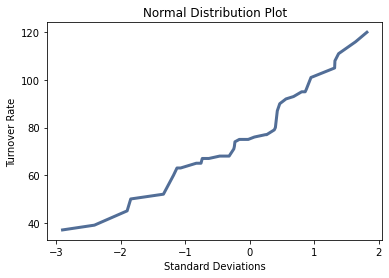

In [257]:
mean, var = thinkstats2.TrimmedMeanVar(nbaDF.TOV, p=0.01)
std = np.sqrt(var)

xs = [-4, 4]
fxs, fys = thinkstats2.FitLine(xs, inter = mean, slope = std)
thinkplot.Plot(fxs, fys, linewidth=5, color='gray', label = 'model')

xs, ys = thinkstats2.NormalProbability(nbaDF.TOV)
thinkplot.Plot(xs, ys, label='Turnover Rate')

thinkplot.Config(title='Normal Distribution Plot',
                 xlabel='Standard Deviations',
                 ylabel='Turnover Rate')

#I expect to see RuntimeWarnings in this block

Scatter Plots

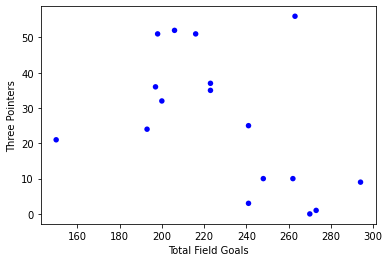

In [258]:
thinkplot.Scatter(tov_high.FG, tov_high.TP, alpha = 1)
thinkplot.Config(xlabel="Total Field Goals", ylabel="Three Pointers", legend=False)

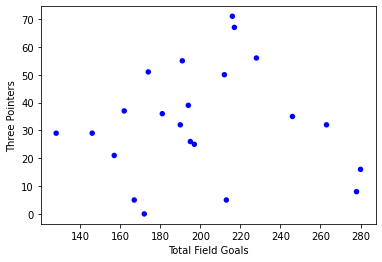

In [259]:
thinkplot.Scatter(tov_low.FG, tov_low.TP, alpha = 1)
thinkplot.Config(xlabel="Total Field Goals", ylabel="Three Pointers", legend=False)

In [260]:
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

In [261]:
Cov(tov_high.FG, tov_high.TP)

-307.01384083044985

In [262]:
Cov(tov_low.FG, tov_low.TP)

18.87809917355371

In [263]:
Corr(tov_high.FG, tov_high.TP)

-0.46272668878436046

In [264]:
Corr(tov_low.FG, tov_low.TP)

0.024669834104076586

In [265]:
SpearmanCorr(tov_high.FG, tov_high.TP)

-0.47174447174447176

In [266]:
SpearmanCorr(tov_low.FG, tov_low.TP)

0.14184803062059237

The above plots and covariance/correlation tests shows a statistically significant relationship between high turnover rates and field goals/three pointers. As turnover rates are higher, the number of made field goals and three pointers is lower, likely as a result of the team not having the ball to score with. 

Testing Difference in Means by P-Value: Kendalls Tau/Permutation

In [267]:
tau, p_value = stats.kendalltau(tov_high.FG, tov_high.TP)
print (tau, p_value)

-0.31343283582089554 0.08257300173758413


In [268]:
nbaDF.cov()

,FG,FGA,TP,TPA,TOV
FG,1702.155196,3331.170040,-172.541835,-409.163968,517.543860
FGA,3331.170040,7415.603239,-146.469636,-96.091093,1248.552632
TP,-172.541835,-146.469636,377.693657,931.761134,-99.149123
TPA,-409.163968,-96.091093,931.761134,2503.085020,-180.657895
TOV,517.543860,1248.552632,-99.149123,-180.657895,409.228070


In [269]:
class DiffMeansPermute(thinkstats2.HypothesisTest):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = abs(group1.mean() - group2.mean())
        return test_stat

    def MakeModel(self):
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self):
        np.random.shuffle(self.pool)
        data = self.pool[:self.n], self.pool[self.n:]
        return data
class DiffStdPermute(DiffMeansPermute):

    def TestStatistic(self, data):
        group1, group2 = data
        test_stat = group1.std() - group2.std()
        return test_stat
data = tov_high.FG.values, tov_high.TP.values

In [270]:
ht = DiffMeansPermute(data)
pvalue = ht.PValue()
pvalue

0.0

Kendall Tau's correlation test result pvalue of .08 indicates a relationship that can almost be considered statistically significant, but not quite. The -.31 kendall correlation value indicates that as the field goal/three pointer value rises the turnover rate drops. Comparing the means of each group resulted in a significant pvalue of 0.0.

Regression Analysis

In [271]:
formula = "TOV ~ FG + FGA + TP + TPA"
results = smf.ols(formula, data=nbaDF).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TOV   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     13.46
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           1.12e-06
Time:                        11:23:30   Log-Likelihood:                -153.60
No. Observations:                  39   AIC:                             317.2
Df Residuals:                      34   BIC:                             325.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.6245     12.818      1.219      0.231     -10.425      41.674
FG            -0.4395      0.195     -2.257      0.031      -0.835      -0.044
FGA            0.3639      0.094      3.886      0.000       0.174       0.554
TP            -0.0166      0.445     -0.037      0.970      -0.920       0.887
TPA           -0.1238      0.185     -0.671      0.507      -0.499       0.252
==============================================================================
Omnibus:                        3.440   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.179   Jarque-Bera (JB):                1.779
Skew:                           0.212   Prob(JB):                        0.411
Kurtosis:                       2.043   Cond. No.                     3.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""